In [1]:
# 1,5,8,11,15,20,23,27,30,33,39,46

In [2]:
import numpy as np
import pandas as pd
#from IPython.display import Markdown as md

# Q1.1
Self‐reported injuries among left‐ and right‐handed people were compared in a
survey of 1986 college students in British Columbia, Canada. Of the 180 lefthanded
students, 93 reported at least one injury, and 619 of the 1716 righthanded
students reported at least one injury in the same period. Arrange the
data in a 2 × 2 table and calculate the proportion of people with at least one
injury during the period of observation for each group.

## A1.1

In [3]:
df = pd.DataFrame()
df.loc['Injury', 'Left-handed'] = 93
df.loc['No Injury', 'Left-handed'] = 180 - 93
df.loc['Injury', 'Right-handed'] = 619
df.loc['No Injury', 'Right-handed'] = 1716 - 619

df.astype(np.int64)

,Left-handed,Right-handed
Injury,93,619
No Injury,87,1097


In [4]:
left_prop = df.loc['Injury', 'Left-handed'] / df['Left-handed'].sum()
right_prop = df.loc['Injury', 'Right-handed'] / df[ 'Right-handed'].sum()

print(f"Left- handed injured proportion: {left_prop :.3f}")
print(f"Right-handed injured proportion: {right_prop :.3f}")

Left- handed injured proportion: 0.517
Right-handed injured proportion: 0.361


# Q1.5
In August 1976, tuberculosis was diagnosed in a high school student (index case)
in Corinth, Mississippi. Subsequently, laboratory studies revealed that the student’s
disease was caused by drug‐resistant tubercule bacilli. An epidemiologic
investigation was conducted at the high school. Table E1.5 gives the rate of
positive tuberculin reactions, determined for various groups of students according
to degree of exposure to the index case.

In [5]:
df = pd.DataFrame()
df.loc['High Exposure', 'Number tested'] = 129
df.loc['High Exposure', 'Number positive'] = 63
df.loc['Low Exposure', 'Number tested'] = 325
df.loc['Low Exposure', 'Number positive'] = 36

df.astype(np.int64)

,Number tested,Number positive
High Exposure,129,63
Low Exposure,325,36


(a) Compute and compare the proportions of positive cases for the two
exposure levels. What would be your conclusion?
(b) Calculate the odds ratio associated with high exposure. Does this result
support your conclusion in part (a)?

## A1.5(a)

In [6]:
props = df['Number positive'] / df['Number tested']
print(props.round(3).to_string())

High Exposure    0.488
Low Exposure     0.111


Students in the "high exposure" group have a much greater proportion of cases (over 4 times).

## A1.5(b)

In [7]:
pos_cases = df['Number positive']
neg_cases = df['Number tested'] - pos_cases

odds = pos_cases / neg_cases
odds_ratio = odds['High Exposure'] / odds['Low Exposure']

odds_ratio.round(3)

7.663

This supports the conclusion that high exposure increases the odds of testing positive.

# Q1.8
A case–control study was conducted in Auckland, New Zealand, to investigate
the effects among regular drinkers of alcohol consumption on both nonfatal
myocardial infarction and coronary death in the 24 hours after drinking. Data
were tabulated separately for men and women (Table E1.8).

In [8]:
index = [
    ['Men', 'Men', 'Women', 'Women'],
    ['No', 'Yes', 'No', 'Yes'],
]

columns = [
    ['Myocardial infarction', 'Myocardial infarction', 'Coronary death', 'Coronary death'],
    ['Controls', 'Cases', 'Controls', 'Cases'],
]

data = [
    [197, 142, 135, 103],
    [201, 136, 159, 69],
    [144, 41, 89, 12],
    [122, 19, 76, 4],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename(('Gender', 'Drink during last 24h'))

df

Myocardial infarction       Coronary death      
                                          Controls Cases       Controls Cases
Gender Drink during last 24h                                                 
Men    No                                      197   142            135   103
       Yes                                     201   136            159    69
Women  No                                      144    41             89    12
       Yes                                     122    19             76     4

(a) Refer to the myocardial infarction data. Calculate separately for men and
women the odds ratio associated with drinking.

(b) Compare the two odds ratios in part (a). When the difference is confirmed
properly, we have an effect modification.

## A1.8(a)

In [9]:
men_drink_odds = df.loc[('Men', 'Yes'), ('Myocardial infarction', 'Cases')] / \
                 df.loc[('Men', 'Yes'), ('Myocardial infarction', 'Controls')]
men_nodrink_odds = df.loc[('Men', 'No'), ('Myocardial infarction', 'Cases')] / \
                   df.loc[('Men', 'No'), ('Myocardial infarction', 'Controls')]

women_drink_odds = df.loc[('Women', 'Yes'), ('Myocardial infarction', 'Cases')] / \
                   df.loc[('Women', 'Yes'), ('Myocardial infarction', 'Controls')]
women_nodrink_odds = df.loc[('Women', 'No'), ('Myocardial infarction', 'Cases')] / \
                     df.loc[('Women', 'No'), ('Myocardial infarction', 'Controls')]

men_OR = men_drink_odds / men_nodrink_odds
women_OR = women_drink_odds / women_nodrink_odds

print(f"  Men OR = {men_OR :.3f}")
print(f"Women OR = {women_OR :.3f}")

  Men OR = 0.939
Women OR = 0.547


## A1.8(b)
The effect in women appears to be stronger (reduced cases of myocardial infarction if drinking in the last 24h).

# Q1.11
Table E1.11 summarizes the coronary heart disease (CHD) and lung cancer
mortality rates per 1000 person‐years by the number of cigarettes smoked per
day at baseline for men participating in the Multiple Risk Factor Intervention
Trial (MRFIT, a very large controlled clinical trial focusing on the relationship
between smoking and cardiovascular diseases). For each cause of death, display
the rates in a bar chart.

In [10]:
index = ['Never‐smokers', 'Ex‐smokers', '1–19 cigarettes/day', '20–39 cigarettes/day', '≥40 cigarettes/day']

columns = [
    ['Total', 'CHD deaths', 'CHD deaths', 'Lung cancer deaths', 'Lung cancer deaths'],
    ['', 'N', 'Rate/1000 person-years', 'N', 'Rate/1000 person-years'],
]

data = [
    [1859, 44, 2.22, 0, 0],
    [2813, 73, 2.44, 13, 0.43],
    [856, 23, 2.56, 2, 0.22],
    [3747, 173, 4.45, 50, 1.29],
    [3591, 115, 3.08, 54, 1.45],
]

df = pd.DataFrame(data=data, index=index, columns=columns)

df

Total CHD deaths                         \
                                    N Rate/1000 person-years   
Never‐smokers         1859         44                   2.22   
Ex‐smokers            2813         73                   2.44   
1–19 cigarettes/day    856         23                   2.56   
20–39 cigarettes/day  3747        173                   4.45   
≥40 cigarettes/day    3591        115                   3.08   

                     Lung cancer deaths                         
                                      N Rate/1000 person-years  
Never‐smokers                         0                   0.00  
Ex‐smokers                           13                   0.43  
1–19 cigarettes/day                   2                   0.22  
20–39 cigarettes/day                 50                   1.29  
≥40 cigarettes/day                   54                   1.45

## A1.11

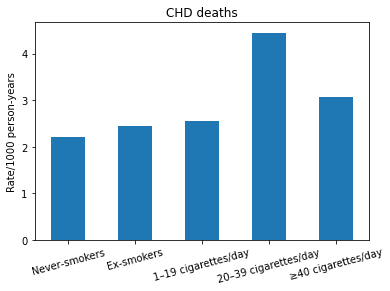

In [11]:
dataset = 'CHD deaths'
metric = 'Rate/1000 person-years'

df.loc[:, (dataset, metric)].plot.bar(
    title=dataset,
    ylabel=metric,
    rot=15,
);

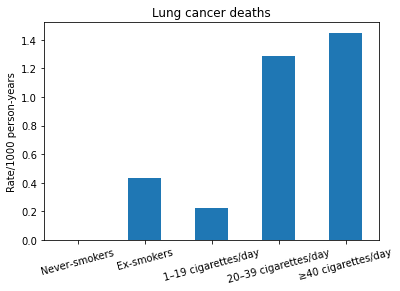

In [12]:
dataset = 'Lung cancer deaths'
metric = 'Rate/1000 person-years'

df.loc[:, (dataset, metric)].plot.bar(
    title=dataset,
    ylabel=metric,
    rot=15,
);

# Q1.15
Consider the data shown in Table E1.15. Calculate the sensitivity and specificity
of x‐ray as a screening test for tuberculosis.

In [13]:
index = ['Negative', 'Positive', 'Total']

columns = [
    ['Tuberculosis', 'Tuberculosis', ''],
    ['No', 'Yes', 'Total'],
]

data = [
    [1739, 8, 1747],
    [51, 22, 73],
    [1790, 30, 1820],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('X-ray')

df

Tuberculosis          
                   No Yes Total
X-ray                          
Negative         1739   8  1747
Positive           51  22    73
Total            1790  30  1820

## A1.15

In [14]:
# Helpful mnemonic:
# SNIP: SeNsitivity Is Positive
# SPIN: SPecificity Is Negative

sens = df.loc['Positive', ('Tuberculosis', 'Yes')] / df.loc['Total', ('Tuberculosis', 'Yes')]
spec = df.loc['Negative', ('Tuberculosis', 'No')] / df.loc['Total', ('Tuberculosis', 'No')]

print(f"Sensitivity = {sens :.3f}")
print(f"Specificity = {spec :.3f}")

Sensitivity = 0.733
Specificity = 0.972


# Q1.20
Refer to the data set in Table 1.1 (see Example 1.2).

(a) Calculate the odds ratio associated with employment in shipyards for
nonsmokers.

(b) Calculate the same odds ratio for smokers.

(d) Assuming that the odds ratios for the two groups, nonsmokers and smokers,
are equal (in other words, smoking is not an effect modifier), calculate the
Mantel–Haenszel estimate of this common odds ratio.

In [15]:
index = [
    ['No', 'No', 'Yes', 'Yes'],
    ['Yes', 'No', 'Yes', 'No'],
]

columns = ['Cases', 'Control']

data = [
    [11, 35],
    [50, 203],
    [84, 45],
    [313, 270],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename(('Smoking', 'Shipbuilding'))

df

Cases  Control
Smoking Shipbuilding                
No      Yes              11       35
        No               50      203
Yes     Yes              84       45
        No              313      270

## A1.20(a)

In [16]:
subdf = df.loc['No']
employed_odds = subdf.loc['Yes', 'Cases'] / subdf.loc['Yes', 'Control']
unemployed_odds = subdf.loc['No', 'Cases'] / subdf.loc['No', 'Control']
odds_ratio = employed_odds / unemployed_odds

print(f"Nonsmoker OR = {odds_ratio :.2f}")

Nonsmoker OR = 1.28


## A1.20(b)

In [17]:
subdf = df.loc['Yes']
employed_odds = subdf.loc['Yes', 'Cases'] / subdf.loc['Yes', 'Control']
unemployed_odds = subdf.loc['No', 'Cases'] / subdf.loc['No', 'Control']
odds_ratio = employed_odds / unemployed_odds

print(f"Smoker OR = {odds_ratio :.2f}")

Smoker OR = 1.61


## A1.20(d)

# Q1.23
Postmenopausal women who develop endometrial cancer are on the whole
heavier than women who do not develop the disease. One possible explanation
is that heavy women are more exposed to endogenous estrogens which are produced
in postmenopausal women by conversion of steroid precursors to active
estrogens in peripheral fat. In the face of varying levels of endogenous estrogen
production, one might ask whether the carcinogenic potential of exogenous
estrogens would be the same in all women. A case–control study has been conducted
to examine the relation among weight, replacement estrogen therapy,
and endometrial cancer. The results are shown in Table E1.23.

(a) Calculate separately for the three weight groups the odds ratio associated
with estrogen replacement.

(b) Compare the three odds ratios in part (a). When the difference is confirmed
properly, we have an effect modification.

(c) Assuming that the odds ratios for the three weight groups are equal (in
other words, weight is not an effect modifier), calculate the Mantel–
Haenszel estimate of this common odds ratio.

In [18]:
index = [
    ['<57', '<57', '57-75', '57-75', '>75', '>75'],
    ['Cases', 'Controls', 'Cases', 'Controls', 'Cases', 'Controls'],
]

columns = [
    ['Estrogen replacement', 'Estrogen replacement'],
    ['Yes', 'No'],
]

data = [
    [20, 12],
    [61, 183],
    [37, 45],
    [113, 378],
    [9, 42],
    [23, 140],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename(('Weight (kg)', ''))

df

Estrogen replacement     
                                      Yes   No
Weight (kg)                                   
<57         Cases                      20   12
            Controls                   61  183
57-75       Cases                      37   45
            Controls                  113  378
>75         Cases                       9   42
            Controls                   23  140

## A1.23(a)

In [19]:
for weight in ['<57', '57-75', '>75']:
    subdf = df.loc[weight]
    
    yes_odds = subdf.loc['Cases', ('Estrogen replacement', 'Yes')] / subdf.loc['Controls', ('Estrogen replacement', 'Yes')]
    no_odds = subdf.loc['Cases', ('Estrogen replacement', 'No')] / subdf.loc['Controls', ('Estrogen replacement', 'No')]
    odds_ratio = yes_odds / no_odds
    
    print(f"{weight :>5} OR = {odds_ratio :.2f}")

  <57 OR = 5.00
57-75 OR = 2.75
  >75 OR = 1.30


## A1.23(b)
The odds ratios decreasing as weight increase.

## A1.23(c)

# Q1.27
Postneonatal mortality due to respiratory illnesses is known to be inversely
related to maternal age, but the role of young motherhood as a risk factor for
respiratory morbidity in infants has not been explored thoroughly. A study
was conducted in Tucson, Arizona, aimed at the incidence of lower respiratory
tract illnesses during the first year of life. In this study, over 1200 infants
were enrolled at birth between 1980 and 1984. The data shown in Table E1.27
are concerned with wheezing lower respiratory tract illnesses (wheezing LRI:
no/yes).

(a) For each of the two groups, boys and girls, choose the lowest age group as
the reference and calculate the odds ratio associated with each age group.

(b) For each of the two groups, boys and girls, calculate the generalized odds
and give your interpretation. How does this result compare with those in
part (a)?

(c) Compare the two generalized odds in part (b) and draw your conclusion.

In [20]:
index = ['<21', '21-25', '26-30', '>30']

columns = [
    ['Boys', 'Boys', 'Girls', 'Girls'],
    ['No', 'Yes', 'No', 'Yes'],
]

data = [
    [19, 8, 20, 7],
    [98, 40, 128, 36],
    [160, 45, 148, 42],
    [110, 20, 116, 25],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Maternal age (years)')

df

Boys     Girls    
                       No Yes    No Yes
Maternal age (years)                   
<21                    19   8    20   7
21-25                  98  40   128  36
26-30                 160  45   148  42
>30                   110  20   116  25

## A1.27(a)

In [21]:
for gender in ['Boys', 'Girls']:
    subdf = df.loc[:, gender]
    ref_odds = subdf.loc['<21', 'Yes'] / subdf.loc['<21', 'No']
    
    for age in ['21-25', '26-30', '>30']:
        age_odds = subdf.loc[age, 'Yes'] / subdf.loc[age, 'No']
        odds_ratio = age_odds / ref_odds
        print(f"{gender :5} {age :>5} OR = {odds_ratio :.2f}")

Boys  21-25 OR = 0.97
Boys  26-30 OR = 0.67
Boys    >30 OR = 0.43
Girls 21-25 OR = 0.80
Girls 26-30 OR = 0.81
Girls   >30 OR = 0.62


## A1.27(b)

## A1.27(c)

# Q1.30
In an effort to provide a complete analysis of the survival of patients with endstage
renal disease (ESRD), data were collected for a sample that included 929
patients who initiated hemodialysis for the first time at the Regional Disease
Program in Minneapolis, Minnesota between 1 January 1976 and 30 June 1982;
all patients were followed until 31 December 1982. Of these 929 patients, 257
are diabetics; among the 672 nondiabetics, 386 are classified as low risk
(without comorbidities such as arteriosclerotic heart disease, peripheral
vascular disease, chronic obstructive pulmonary, and cancer). For the low‐risk
ESRD patients, we have the follow‐up data shown in Table E1.30 (in addition
to those in Example 1.12).

Compute the follow‐up death rate for each age group
and the relative risk for the group “70+” versus “51–60.”

In [22]:
index = ['21–30', '31–40', '41–50', '51–60', '61–70', '70+']

columns = ['Deaths', 'Treatment months']

data = [
    [4, 1012],
    [7, 1387],
    [20, 1706],
    [24, 2448],
    [21, 2060],
    [17, 846],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Age (years)')

df

,Deaths,Treatment months
Age (years),,
21–30,4,1012
31–40,7,1387
41–50,20,1706
51–60,24,2448
61–70,21,2060
70+,17,846


## A1.30

In [23]:
df['Deaths/1000 trt. months'] = 1000 * df['Deaths'] / df['Treatment months']
df.round(2)

,Deaths,Treatment months,Deaths/1000 trt. months
Age (years),,,
21–30,4,1012,3.95
31–40,7,1387,5.05
41–50,20,1706,11.72
51–60,24,2448,9.80
61–70,21,2060,10.19
70+,17,846,20.09


In [24]:
rr = df.loc['70+', 'Deaths/1000 trt. months'] / df.loc['51–60', 'Deaths/1000 trt. months']
print(f"Relative risk of 70+ years vs. 51–60 years = {rr :.2f}")

Relative risk of 70+ years vs. 51–60 years = 2.05


# Q1.33
Some 7000 British workers exposed to vinyl chloride monomer were followed
for several years to determine whether their mortality experience differed from
those of the general population. In addition to data for deaths from cancers as
seen in Example 1.20 (Table 1.23), the study also provided the data shown in
Table E1.33 for deaths due to circulatory disease.

Calculate the SMR for each
subgroup and the relative risk for group “15+” versus group “1–4.”

In [25]:
index = ['Observed', 'Expected']

columns = [
    ['Years since entering the industry'] * 4 + ['Total'],
    ['1-4', '5-9', '10-14', '15+', ''],
]

data = [
    [7, 25, 38, 110, 180],
    [32.5, 35.6, 44.9, 121.3, 234.1],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Deaths')

df

Years since entering the industry                     Total
                                       1-4   5-9 10-14    15+       
Deaths                                                              
Observed                               7.0  25.0  38.0  110.0  180.0
Expected                              32.5  35.6  44.9  121.3  234.1

# Q1.39
Sudden infant death syndrome (SIDS), also known as sudden unexplained
death, crib death, or cot death, claims the lives of an alarming number of
apparently
normal infants every year. In a study at the University of Connecticut
School of Medicine, significant associations were found between SIDS and
certain demographic characteristics. Some of the summarized data are given in
Table E1.39. (Expected deaths are calculated using Connecticut infant mortality
data for 1974–1976.)

(a) Calculate the standardized mortality ratio (SMR) for each subgroup.

(b) Compare males with females and blacks with whites.

In [26]:
index = [
    ['Gender', 'Gender', 'Race', 'Race'],
    ['Male', 'Female', 'Black', 'White'],
]

columns = [
    ['Number of deaths'] * 2,
    ['Observed', 'Expected'],
]

data = [
    [55, 45],
    [35, 45],
    [23, 11],
    [67, 79],
]

df = pd.DataFrame(data=data, index=index, columns=columns)

df

Number of deaths         
                      Observed Expected
Gender Male                 55       45
       Female               35       45
Race   Black                23       11
       White                67       79

# Q1.46
When a patient is diagnosed as having cancer of the prostate, an important
question in deciding on a treatment strategy is whether or not the cancer has
spread to the neighboring lymph nodes. The question is so critical in prognosis
and treatment that it is customary to operate on the patient (i.e., perform a
laparotomy)
for the sole purpose of examining the nodes and removing tissue
samples to examine under the microscope for evidence of cancer. However,
certain variables that can be measured without surgery are predictive of the
nodal involvement; and the purpose of the study presented here was to examine
the data for 53 prostate cancer patients receiving surgery to determine which
of five preoperative variables are predictive of nodal involvement. Table E1.46
presents the complete data set. For each of the 53 patients, there are two
continuous
independent variables, age at diagnosis and level of serum acid
phosphatase (×100; called “acid”), and three binary variables: x‐ray reading,
pathology reading (grade) of a biopsy of the tumor obtained by needle before
surgery, and a rough measure of the size and location of the tumor (stage)
obtained by palpation with the fingers via the rectum. For these three binary
independent variables, a value of 1 signifies a positive or more serious state
and a 0 denotes a negative or less serious finding. In addition, the sixth column
presents the finding at surgery—the primary outcome of interest, which is
binary, a value of 1 denoting nodal involvement, and a value of 0 denoting no
nodal involvement found at surgery. In this exercise we investigate the effects
of the three binary preoperative variables (x‐ray, grade, stage); the effects of
the two continuous factors (age, acid phosphatase) will be studied in an
exercise in Chapter 2.

(a) Arrange the data on nodes and x‐ray into a 2 × 2 table, calculate the odds
ratio associated with x‐ray and give your interpretation.

(b) Arrange the data on nodes and grade into a 2 × 2 table, calculate the odds
ratio associated with grade and give your interpretation.

(c) Arrange the data on nodes and stage into a 2 × 2 table, calculate the odds
ratio associated with stage and give your interpretation.

In [27]:
df = pd.read_csv('assets/Ch1_Q46_data.txt', sep=' & ', engine='python')

print(f"df num rows: {df.shape[0]}")
df.head()

df num rows: 53


,Xray,Grade,Stage,Age,Acid,Nodes
0,0,1,1,64,40,0
1,0,0,1,63,40,0
2,1,0,0,65,46,0
3,0,1,0,67,47,0
4,0,0,0,66,48,0
